# Neural Networks

Neural networks are a subset of machine learning algorithms inspired by the structure and function of the human brain. They consist of interconnected layers of nodes (neurons) that process data by passing it through weights, biases, and activation functions.

## Key Components
1. **Neurons (Nodes)**: Basic computational units that receive input, apply a weight and bias, and pass it through an activation function.
2. **Layers**:
   - **Input Layer**: Receives the raw data.
   - **Hidden Layers**: Perform computations, enabling the network to learn complex patterns.
   - **Output Layer**: Produces the final result.
3. **Weights and Biases**: Parameters adjusted during training to minimize error.
4. **Activation Functions**: Introduce non-linearity, allowing the network to learn more complex mappings (e.g., ReLU, sigmoid, tanh).

## Types of Neural Networks
1. **Feedforward Neural Networks (FNN)**: Data flows in one direction, often used for tasks like classification and regression.
2. **Convolutional Neural Networks (CNNs)**: Specialized for image data, using convolution layers to extract features.
3. **Recurrent Neural Networks (RNNs)**: Designed for sequential data (e.g., time series, text), using loops to retain memory of previous inputs.
4. **Generative Adversarial Networks (GANs)**: Consist of two networks (generator and discriminator) that compete to generate realistic data.
5. **Transformers**: Modern architectures (e.g., GPT, BERT) for sequence processing, replacing RNNs in many applications.

## Applications
- **Manufacturing**: Predictive maintenance, quality control, demand forecasting.
- **Healthcare**: Disease diagnosis, drug discovery.
- **Finance**: Fraud detection, algorithmic trading.
- **Natural Language Processing (NLP)**: Chatbots, translation, sentiment analysis.
- **Image Processing**: Object detection, facial recognition.

## Training a Neural Network
1. **Forward Propagation**: Compute the output for a given input.
2. **Loss Function**: Measure the difference between the predicted output and the actual target.
3. **Backward Propagation**: Adjust weights and biases using gradient descent to minimize the loss.
4. **Optimization**: Algorithms like stochastic gradient descent (SGD), Adam, or RMSprop refine the model.

## Challenges
- **Overfitting**: The network performs well on training data but poorly on unseen data.
- **Data Requirements**: Neural networks often require large datasets.
- **Computation**: Training deep networks can be resource-intensive.

---



## Load Libraries and Generate Data

In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
class NeuralNetwork:
    def __init__(self, layers: list[int], learning_rate: float = 0.01, epochs: int = 1000):
        """
        Initialize neural network with specified layer architecture.
        
        Parameters:
        - layers: List of integers representing the number of neurons in each layer.
        - learning_rate: Learning rate for weight updates.
        - epochs: Number of training iterations.
        """
        self.layers = layers
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = []
        self.biases = []

        # Xavier initialization for weights
        for i in range(len(layers) - 1):
            limit = np.sqrt(6 / (layers[i] + layers[i + 1]))
            self.weights.append(np.random.uniform(-limit, limit, (layers[i], layers[i + 1])))
            self.biases.append(np.zeros((1, layers[i + 1])))

    @staticmethod
    def relu(x: np.ndarray) -> np.ndarray:
        """ReLU activation function."""
        return np.maximum(0, x)

    @staticmethod
    def relu_derivative(x: np.ndarray) -> np.ndarray:
        """Derivative of ReLU activation."""
        return (x > 0).astype(float)

    @staticmethod
    def softmax(x: np.ndarray) -> np.ndarray:
        """Softmax activation for the output layer."""
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def forward_propagation(self, X: np.ndarray) -> np.ndarray:
        """Perform forward propagation through the network."""
        self.layer_outputs = [X]
        for i in range(len(self.layers) - 1):
            Z = np.dot(self.layer_outputs[-1], self.weights[i]) + self.biases[i]
            A = self.relu(Z) if i < len(self.layers) - 2 else self.softmax(Z)
            self.layer_outputs.append(A)
        return self.layer_outputs[-1]

    def backward_propagation(self, X: np.ndarray, y: np.ndarray) -> tuple[list[np.ndarray], list[np.ndarray]]:
        """Perform backpropagation to compute gradients."""
        m = X.shape[0]
        output = self.layer_outputs[-1]
        dZ = output - y

        gradients_weights = []
        gradients_biases = []

        for i in range(len(self.layers) - 1, 0, -1):
            dW = (1 / m) * np.dot(self.layer_outputs[i - 1].T, dZ)
            db = (1 / m) * np.sum(dZ, axis=0, keepdims=True)
            gradients_weights.insert(0, dW)
            gradients_biases.insert(0, db)

            if i > 1:
                dZ = np.dot(dZ, self.weights[i - 1].T) * self.relu_derivative(self.layer_outputs[i - 1])

        return gradients_weights, gradients_biases

    def train(self, X: np.ndarray, y: np.ndarray):
        """Train the neural network."""
        y_one_hot = np.eye(self.layers[-1])[y]
        self.training_loss = []

        for epoch in range(self.epochs):
            output = self.forward_propagation(X)
            loss = -np.mean(np.sum(y_one_hot * np.log(np.clip(output, 1e-15, 1)), axis=1))
            self.training_loss.append(loss)
            gradients_weights, gradients_biases = self.backward_propagation(X, y_one_hot)

            for i in range(len(self.layers) - 1):
                self.weights[i] -= self.learning_rate * gradients_weights[i]
                self.biases[i] -= self.learning_rate * gradients_biases[i]

    def predict(self, X: np.ndarray) -> np.ndarray:
        """Make predictions."""
        output = self.forward_propagation(X)
        return np.argmax(output, axis=1)


# Generate synthetic dataset
X, y = make_classification(n_samples=5000, n_features=20, n_classes=3,
                           n_informative=10, random_state=42, weights=[0.6, 0.3, 0.1])

## Train Neural Network and Make Predictions

In [3]:
# Apply SMOTE for class balancing
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the neural network
nn = NeuralNetwork(layers=[20, 64, 32, 3], learning_rate=0.01, epochs=1500)
nn.train(X_train_scaled, y_train)

# Make predictions
y_pred = nn.predict(X_test_scaled)

c:\Users\NANAYAW\anaconda3\envs\ML-env\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\NANAYAW\anaconda3\envs\ML-env\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(



## Visualization and Metrics

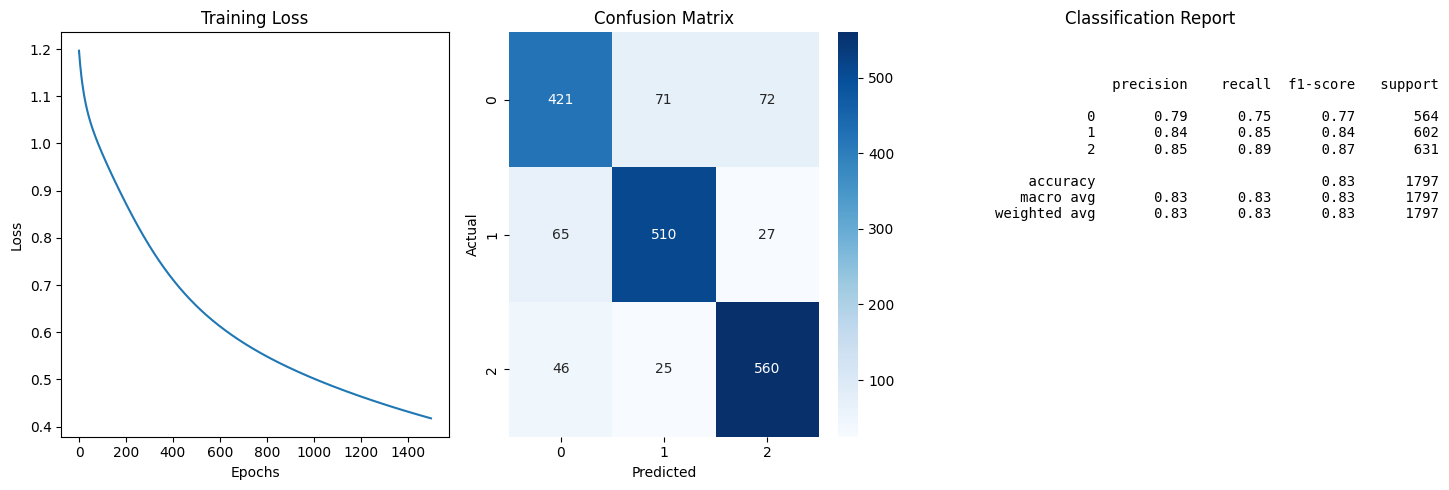

Overall Accuracy: 82.97%

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       564
           1       0.84      0.85      0.84       602
           2       0.85      0.89      0.87       631

    accuracy                           0.83      1797
   macro avg       0.83      0.83      0.83      1797
weighted avg       0.83      0.83      0.83      1797



In [4]:
plt.figure(figsize=(15, 5))

# 1. Training Loss Plot
plt.subplot(131)
plt.plot(nn.training_loss)
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# 2. Confusion Matrix
plt.subplot(132)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 3. Classification Report
plt.subplot(133)
plt.text(0.1, 0.5, classification_report(y_test, y_pred),
         fontsize=10, family='monospace')
plt.title('Classification Report')
plt.axis('off')

# Overall accuracy
accuracy = accuracy_score(y_test, y_pred)

plt.tight_layout()
plt.show()

print(f"Overall Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
from torchvision import datasets, transforms, models
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix, classification_report
from torch.optim.lr_scheduler import ReduceLROnPlateau
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2
from tqdm import tqdm

ModuleNotFoundError: No module named 'torch'

In [2]:
import torch
print(torch.__version__)


ModuleNotFoundError: No module named 'torch'

In [ ]:


# Set random seeds for reproducibility
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True

set_seed()

class WasteClassifier(nn.Module):
    def __init__(self, num_classes=1):
        super().__init__()
        self.model = models.efficientnet_b0(pretrained=True)
        
        # Freeze early layers
        for param in list(self.model.parameters())[:-30]:
            param.requires_grad = False
            
        # Replace classifier head
        self.model.classifier = nn.Sequential(
            nn.Dropout(p=0.3),
            nn.Linear(1280, 512),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.Linear(512, num_classes)
        )
        
    def forward(self, x):
        return self.model(x)

class WasteDataset(Dataset):
    def __init__(self, paths, transform=None, is_test=False):
        self.paths = paths
        self.transform = transform
        self.is_test = is_test
        
    def __len__(self):
        return len(self.paths)
    
    def __getitem__(self, idx):
        img_path = self.paths[idx]
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        label = 1 if "O" in img_path else 0
        
        if self.transform:
            augmented = self.transform(image=image)
            image = augmented['image']
            
        if self.is_test:
            return image, label, img_path
        return image, label

def get_transforms(mode="train"):
    if mode == "train":
        return A.Compose([
            A.RandomResizedCrop(224, 224, scale=(0.8, 1.0)),
            A.HorizontalFlip(p=0.5),
            A.VerticalFlip(p=0.5),
            A.ShiftScaleRotate(p=0.5),
            A.OneOf([
                A.GaussNoise(),
                A.GaussianBlur(),
                A.MotionBlur(),
            ], p=0.3),
            A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1, p=0.3),
            A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
            ToTensorV2()
        ])
    else:
        return A.Compose([
            A.Resize(224, 224),
            A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
            ToTensorV2()
        ])

class AverageMeter:
    def __init__(self):
        self.reset()
        
    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0
        
    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

def train_epoch(model, loader, criterion, optimizer, device):
    model.train()
    losses = AverageMeter()
    accuracies = AverageMeter()
    
    pbar = tqdm(loader, desc='Training')
    for images, labels in pbar:
        images, labels = images.to(device), labels.float().to(device)
        batch_size = images.size(0)
        
        optimizer.zero_grad()
        outputs = model(images).squeeze()
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        preds = (torch.sigmoid(outputs) > 0.5).float()
        acc = (preds == labels).float().mean()
        
        losses.update(loss.item(), batch_size)
        accuracies.update(acc.item(), batch_size)
        
        pbar.set_postfix({'Loss': f'{losses.avg:.4f}', 'Acc': f'{accuracies.avg:.4f}'})
        
    return losses.avg, accuracies.avg

def validate_epoch(model, loader, criterion, device):
    model.eval()
    losses = AverageMeter()
    accuracies = AverageMeter()
    all_preds, all_labels = [], []
    
    with torch.no_grad():
        for images, labels in tqdm(loader, desc='Validating'):
            images, labels = images.to(device), labels.float().to(device)
            batch_size = images.size(0)
            
            outputs = model(images).squeeze()
            loss = criterion(outputs, labels)
            
            preds = (torch.sigmoid(outputs) > 0.5).float()
            acc = (preds == labels).float().mean()
            
            losses.update(loss.item(), batch_size)
            accuracies.update(acc.item(), batch_size)
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    return losses.avg, accuracies.avg, all_preds, all_labels

def plot_metrics(train_metrics, val_metrics, metric_name):
    plt.figure(figsize=(10, 5))
    plt.plot(train_metrics, label=f'Train {metric_name}')
    plt.plot(val_metrics, label=f'Val {metric_name}')
    plt.title(f'{metric_name} over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel(metric_name)
    plt.legend()
    plt.grid(True)
    plt.show()

def main():
    # Device configuration
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")
    
    # Load and prepare data
    # (Use your existing data loading code here)
    
    # Create datasets and dataloaders
    train_dataset = WasteDataset(train_paths, transform=get_transforms("train"))
    val_dataset = WasteDataset(val_paths, transform=get_transforms("val"))
    test_dataset = WasteDataset(test_paths, transform=get_transforms("val"), is_test=True)
    
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4, pin_memory=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)
    
    # Initialize model and training components
    model = WasteClassifier().to(device)
    criterion = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4, weight_decay=0.01)
    scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True)
    
    # Training loop
    num_epochs = 20
    best_val_loss = float('inf')
    train_losses, val_losses = [], []
    train_accs, val_accs = [], []
    
    for epoch in range(num_epochs):
        print(f"\nEpoch {epoch+1}/{num_epochs}")
        
        train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
        val_loss, val_acc, _, _ = validate_epoch(model, val_loader, criterion, device)
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accs.append(train_acc)
        val_accs.append(val_acc)
        
        scheduler.step(val_loss)
        
        # Save best model
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_model.pth')
        
        print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}")
        print(f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")
    
    # Plot training metrics
    plot_metrics(train_losses, val_losses, 'Loss')
    plot_metrics(train_accs, val_accs, 'Accuracy')
    
    # Load best model and evaluate on test set
    model.load_state_dict(torch.load('best_model.pth'))
    _, _, test_preds, test_labels = validate_epoch(model, test_loader, criterion, device)
    
    # Print classification report and plot confusion matrix
    print("\nClassification Report:")
    print(classification_report(test_labels, test_preds, target_names=['Recycle', 'Organic']))
    
    cm = confusion_matrix(test_labels, test_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Recycle', 'Organic'], 
                yticklabels=['Recycle', 'Organic'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

if __name__ == "__main__":
    main()